<a href="https://colab.research.google.com/github/elizathornton/Caregiver-Projects/blob/main/Caregiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lonliness Among Caregivers - Data Exploration 
In this project I will explore the public data set put out by National Alliance for Caregiving provided under a creative commons license.  Their fanastic 2020 report on caregiving in the US can be found here: https://www.caregiving.org/research/caregiving-in-the-us/caregiving-in-the-us-2020/.
These data are very comprehensive, combining surveys from about 15,000 caregivers.  In this exploration, I want to look at feelings of isolation and loneliness among caregivers.  

In [ ]:
!pip install jupyter-dash
!pip install dash-bootstrap-components
!pip install pyreadstat

import pyreadstat
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

from jupyter_dash import JupyterDash
import dash
from dash import Dash, dcc, html, Input, Output, State
from dash.html import Div
import dash_bootstrap_components as dbc



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


df, meta  = pyreadstat.read_sav('/content/drive/My Drive/Caregiver Projects/data/Data - 2020 CG in US Public Use file FINAL.sav')

In [ ]:
df.head()


,TRENDID,year,status,QFLAG,dov_flag,SCREEN,smptyp14,mode,SC1a,SC1b,...,lang,HH14WGT,IND14WGT,WGTAcg,WGT65plus,WGT6574,WGT75plus,ASflag,OLDflag,valdated
0,140001.0,2014.0,2.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,1.0,0.716300,0.74777,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,140002.0,2014.0,2.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,1.0,1.106146,1.69266,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,140003.0,2014.0,2.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,1.0,0.775124,1.70101,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,140004.0,2014.0,1.0,1.0,100.0,1.0,1.0,3.0,1.0,3.0,...,1.0,1.111659,0.84076,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,140005.0,2014.0,2.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,1.0,0.881664,0.77914,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# What I want to visualize in this data set

I want to highlight differences in the caregiving situations between those who feel alone and those who don't feel alone.  To start I am going to separate the pool into 2 divisions: caregivers who answered "Agree" or "Strongly Agree" to the question "I feel alone" and those who answered differently. This will be stored in a feature called "alone" which will have the value 0 if the caregiver does not feel alone and 1 if the caregiver does feel alone.  

Next I am going to look at a series of survey questions highlighting different caregiving scenarios and plot what percentage of caregivers in that scenario report feeling alone. In some questions this will be straighforward.   For instance, question q17f asks if the recipient needs care because of a behavioral issue.  The possible values are:
 1 - yes
 2 - no
 3 - don't know
 4 - refused
 In this case I will consider those who answered yes as having a recpient that needs care for a behavioral issue. 
 Other  questions will require binning the data.  For example q7 asks the caregiver relationship to the caregivee and has 37 possible answers.  I will create a feature called "partner", combine the answers that imply a parnter relationship (spouse, partner, former spouse, same-sex partner) encoded to a value of 1, and combine all the other relationships (parent, grandparent, sibling, etc) to a value of 0.



In [ ]:
# make a feature called "alone" that is 1 if the person answered "agree" "strongly agree" with "I feel alone" 
# and 0 if they answered "disagree" or "strongly disagree"

df['alone'] = np.where((df['m5c'] ==4) | (df['m5c']==5), 1, 0)  # 1 if alone, 0 all else

In [ ]:
# Create a new dataframe with the relationships we want to plot
dfa = pd.DataFrame()

In [ ]:
def create_plot(measure,answers, plot_label):

  for j in answers:
    den= df[measure].value_counts()[j] 
    num = df.groupby(measure).sum().loc[j,'alone'] # this is the number of people who answered yes to the question and also answered "I feel alone"
    dfa[answers[j]] = [num/den]

  plot = sns.barplot(data= dfa[answers.values()])  
  plot.set(xlabel=plot_label, ylabel='Percent of caregivers who feel alone')
  return plot


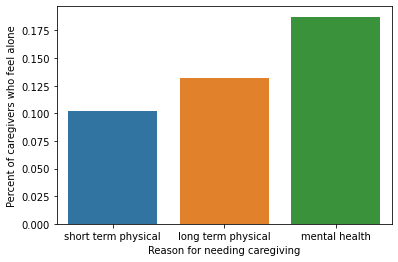

In [ ]:
#q17a - short term physical condition
#q17b - long term physical condition 1 = yes, 2 = no
#q17c - emotional or mental health

cause =  {'q17a': 'short term physical', 'q17b': 'long term physical', 'q17c': 'mental health'}
for i in cause:
  den= df[i].value_counts()[1] # this is the number of people who answered yes to the question
  num = df.groupby(i).sum().loc[1,'alone'] # this is the number of people who answered yes to the question and also answered "I feel alone"
  dfa[cause[i]] = [ num/den] # this is the percentage of people who answered yes to the question and also answered "I feel alone"

cause_plot = sns.barplot(data= dfa)
cause_plot.set(xlabel='Reason for needing caregiving', ylabel='Percent of caregivers who feel alone')
plt.show()

 

# Examine the relationship between caregiver and recipient

Question q7 details the various relationships represented.  I want to seperate out partner relationships from non-partner relationships and explore if there is a difference in feelings of lonliness. 

80 549


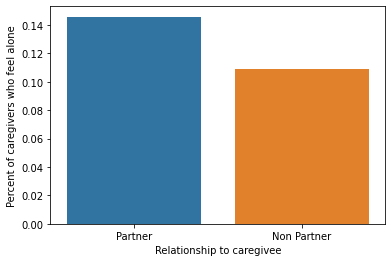

In [ ]:

i = 'q7'
partner_answers = [4,20,35, 36]
den= df[i].value_counts()[partner_answers].sum() # this is the number of people who answered yes to the question
num = df.groupby(i).sum().loc[partner_answers,'alone'].sum() # this is the number of people who answered yes to the question and also answered "I feel alone"
dfa['Partner'] = [num/den]
print(num, den)

den= df[i].value_counts().sum() - den # all relationships except partner relationships
num = df.groupby(i).sum().loc[:,'alone'].sum()  - num
dfa['Non Partner'] = [num/den]

relationship_plot = sns.barplot(data= dfa[["Partner","Non Partner"]])  
relationship_plot.set(xlabel='Relationship to caregivee', ylabel='Percent of caregivers who feel alone')
plt.show()


# Lonliness in caregivers who live with the recipient vs those who live in different households

1 1419 230
2 1986 162


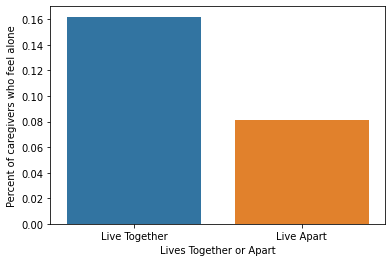

In [ ]:
measure = 'banlives'
answer = {1:'Live Together', 2:'Live Apart'}
plot_label = 'Lives Together or Apart'
together_plot = create_plot(measure, answer, plot_label)
plt.show()

# Lonliness in caregivers of recpients with and without dementia

1 827 124
2 2202 198


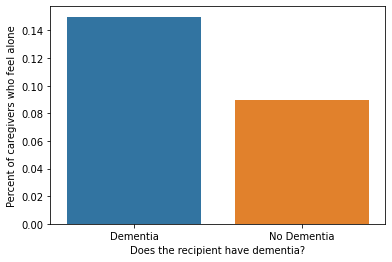

In [ ]:
measure ='alzdem'
answer = {1:'Dementia',2:'No Dementia'}
plot_label = "Does the recipient have dementia?"
dementia_plot = create_plot(measure, answer, plot_label)
plt.show() 

# Length of time of caregiving

2 842 47
3 640 72
4 927 114
5 466 77
6 496 81


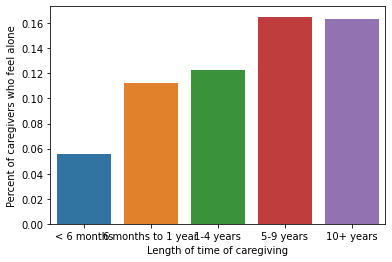

In [ ]:
measure = "q21cat"
answers = {2:'< 6 months', 3: '6 months to 1 year', 4:'1-4 years', 5: '5-9 years', 6 :'10+ years'}
plot_label = 'Length of time of caregiving'
time_plot = create_plot(measure, answers, plot_label)
plt.show()

#Dealing with Incontinence

1 639 106
2 2703 275


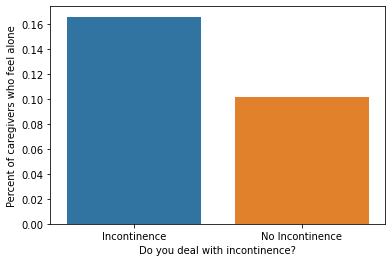

In [ ]:
measure ="q22e"
answers = {1: "Incontinence", 2:"No Incontinence"}
plot_label = "Do you deal with incontinence?"
incontinence_plot = create_plot(measure, answers, plot_label)
plt.show()

# Hours of caregiving per week

1 1459 100
2 733 109
3 357 49
4 797 130


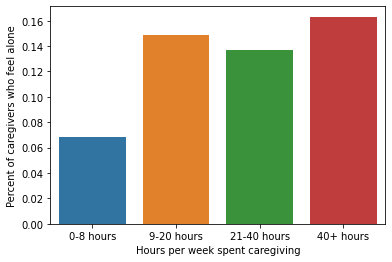

In [ ]:
measure = "hourscat"
answers = {1:'0-8 hours', 2: '9-20 hours', 3:'21-40 hours', 4: '40+ hours'}
plot_label = 'Hours per week spent caregiving'
hours_plot = create_plot(measure, answers, plot_label)
plt.show()

# Overall Burden of Care

1 873 51
2 507 59
3 568 62
4 893 137
5 511 81


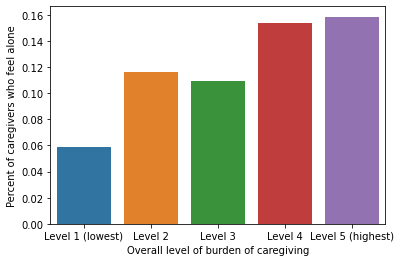

In [ ]:
measure = "burden"
answers = {1:'Level 1 (lowest)', 2: 'Level 2', 3:'Level 3', 4: 'Level 4', 5 :'Level 5 (highest)'}
plot_label = "Overall level of burden of caregiving"
burden_plot = create_plot(measure, answers, plot_label)
plt.show()


# Anyone else provided unpaid help to recipient in past 12 months

1 1801 158
2 1547 232


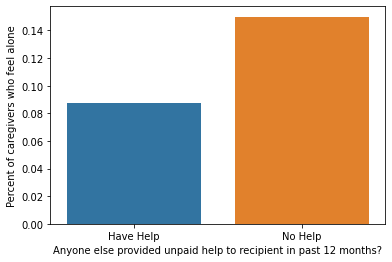

In [ ]:
measure = "Q28"
answers = {1: "Have Help", 2: "No Help"}
plot_label = "Anyone else provided unpaid help to recipient in past 12 months?"
help_plot = create_plot(measure,answers, plot_label)
plt.show()

# Feels had a choice to take on caring for recipient

1 1583 107
2 1756 284


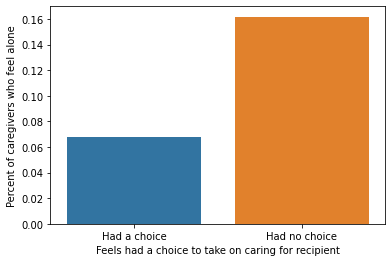

In [ ]:
measure = 'Q39' # Feels had a choice to take on caring for recipient
answers = {1:"Had a choice", 2:"Had no choice"}
plot_label ="Feels had a choice to take on caring for recipient"
plot = create_plot(measure, answers, plot_label)
plt.show()


# Is the caregiver employed?

1 1647 190
2 1697 202


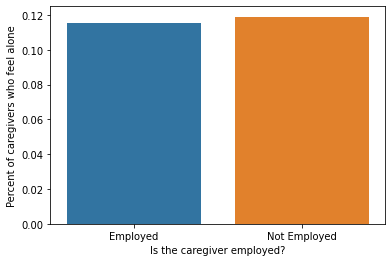

In [ ]:
measure = "Q32A"
answers = {1:"Employed", 2:"Not Employed"}
plot_label = "Is the caregiver employed?"
employed_plot = create_plot(measure, answers, plot_label)
plt.show()

# Ever Had doctor, nurse, social work ask what you need to care for recipient?

1 1051 127
2 2258 258


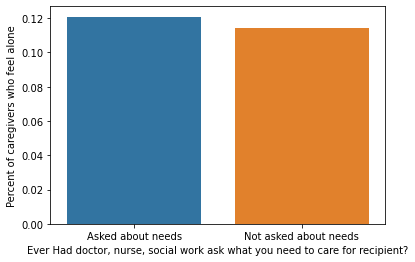

In [ ]:
measure = "q45e"
answers = {1:"Asked about needs", 2:"Not asked about needs"}
plot_label = "Ever Had doctor, nurse, social work ask what you need to care for recipient?"
asked_plot = create_plot(measure, answers, plot_label)
plt.show()

# Connected with other caregivers online?

1 149 51
2 1447 322


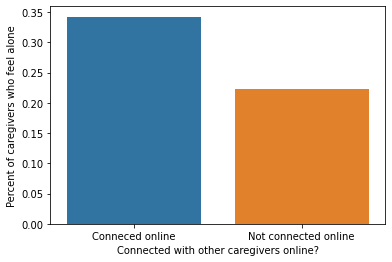

In [ ]:
measure = "m7g"
answers = {1:"Conneced online", 2:"Not connected online"}
plot_label = "Connected with other caregivers online?"
connected_plot = create_plot(measure, answers, plot_label)
plt.show()